In [1]:
import pandas as pd
import numpy as np
import seaborn as sns


In [2]:
Data=pd.read_csv('traffic volume - traffic volume.csv')

In [3]:
Data.head()

,holiday,temp,rain,snow,weather,date,Time,traffic_volume
0,NaN,288.28,0.0,0.0,Clouds,02-10-2012,9:00:00,5545
1,NaN,289.36,0.0,0.0,Clouds,02-10-2012,10:00:00,4516
2,NaN,289.58,0.0,0.0,Clouds,02-10-2012,11:00:00,4767
3,NaN,290.13,0.0,0.0,Clouds,02-10-2012,12:00:00,5026
4,NaN,291.14,0.0,0.0,Clouds,02-10-2012,13:00:00,4918


In [4]:
Data.shape

(48204, 8)

In [5]:
Data.describe().T

,count,mean,std,min,25%,50%,75%,max
temp,48151.0,281.205351,13.343675,0.0,272.16,282.46,291.81,310.07
rain,48202.0,0.334278,44.790062,0.0,0.00,0.00,0.00,9831.30
snow,48192.0,0.000222,0.008169,0.0,0.00,0.00,0.00,0.51
traffic_volume,48204.0,3259.818355,1986.860670,0.0,1193.00,3380.00,4933.00,7280.00


In [6]:
Data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48204 entries, 0 to 48203
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   holiday         61 non-null     object 
 1   temp            48151 non-null  float64
 2   rain            48202 non-null  float64
 3   snow            48192 non-null  float64
 4   weather         48155 non-null  object 
 5   date            48204 non-null  object 
 6   Time            48204 non-null  object 
 7   traffic_volume  48204 non-null  int64  
dtypes: float64(3), int64(1), object(4)
memory usage: 2.9+ MB


In [7]:
Data.isnull().sum()

holiday           48143
temp                 53
rain                  2
snow                 12
weather              49
date                  0
Time                  0
traffic_volume        0
dtype: int64

In [8]:
Data['temp'] = Data['temp'].fillna(Data['temp'].mean())
Data['rain'] = Data['rain'].fillna(Data['rain'].mean())
Data['snow'] = Data['snow'].fillna(Data['snow'].mean())


In [9]:
from collections import Counter
print(Counter(Data['weather']))


Counter({'Clouds': 15144, 'Clear': 13383, 'Mist': 5942, 'Rain': 5665, 'Snow': 2875, 'Drizzle': 1818, 'Haze': 1359, 'Thunderstorm': 1033, 'Fog': 912, nan: 49, 'Smoke': 20, 'Squall': 4})


In [10]:
Data['weather'] = Data['weather'].fillna('Clouds')


In [11]:
# Fill NaN values with 'Not Holiday'
Data['holiday'] = Data['holiday'].fillna('Not Holiday')

# Convert holidays to 1 and 'Not Holiday' to 0
Data['holiday'] = Data['holiday'].apply(lambda x: 0 if x == 'Not Holiday' else 1)


In [12]:
Data['holiday'] = pd.to_numeric(Data['holiday'], errors='coerce')


In [13]:
Data.isnull().sum()


holiday           0
temp              0
rain              0
snow              0
weather           0
date              0
Time              0
traffic_volume    0
dtype: int64

In [14]:
weather_mapping = {
    'Clear': 0, 'Clouds': 1, 'Rain': 2, 'Drizzle': 3, 'Mist': 4, 
    'Haze': 5, 'Fog': 6, 'Thunderstorm': 7, 'Snow': 8, 'Squall': 9, 'Smoke': 10
}

Data['weather'] = Data['weather'].map(weather_mapping)


In [15]:
Data[["day", "month", "year"]] = Data["date"].str.split("-", expand = True)

In [16]:
Data[["hours", "minutes", "seconds"]] = Data["Time"].str.split(":", expand = True)

In [17]:
Data.drop(columns=['date', 'Time'],axis=1,inplace=True)

In [18]:
Data.head()

,holiday,temp,rain,snow,weather,traffic_volume,day,month,year,hours,minutes,seconds
0,0,288.28,0.0,0.0,1,5545,02,10,2012,9,00,00
1,0,289.36,0.0,0.0,1,4516,02,10,2012,10,00,00
2,0,289.58,0.0,0.0,1,4767,02,10,2012,11,00,00
3,0,290.13,0.0,0.0,1,5026,02,10,2012,12,00,00
4,0,291.14,0.0,0.0,1,4918,02,10,2012,13,00,00


In [19]:
Data.dtypes

holiday             int64
temp              float64
rain              float64
snow              float64
weather             int64
traffic_volume      int64
day                object
month              object
year               object
hours              object
minutes            object
seconds            object
dtype: object

In [20]:
# Convert object columns to integers
cols_to_convert = ['day', 'month', 'year', 'hours', 'minutes', 'seconds']
Data[cols_to_convert] = Data[cols_to_convert].astype(int)

# Verify the data types
print(Data.dtypes)


holiday             int64
temp              float64
rain              float64
snow              float64
weather             int64
traffic_volume      int64
day                 int32
month               int32
year                int32
hours               int32
minutes             int32
seconds             int32
dtype: object


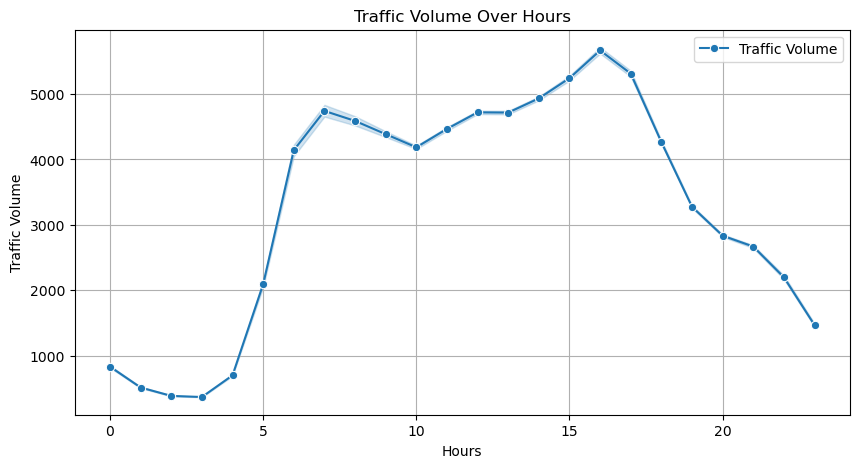

In [21]:
import matplotlib.pyplot as plt
import seaborn as sns
# Line Plot: Traffic Volume Over Hours
plt.figure(figsize=(10, 5))
sns.lineplot(x='hours', y='traffic_volume', data = Data, marker='o', label='Traffic Volume')
plt.title('Traffic Volume Over Hours')
plt.xlabel('Hours')
plt.ylabel('Traffic Volume')
plt.grid()
plt.show()

C:\Users\devra\AppData\Local\Temp\ipykernel_20628\1937573619.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x='holiday', y='traffic_volume', data=holiday_traffic, palette=['lightblue', 'salmon'])


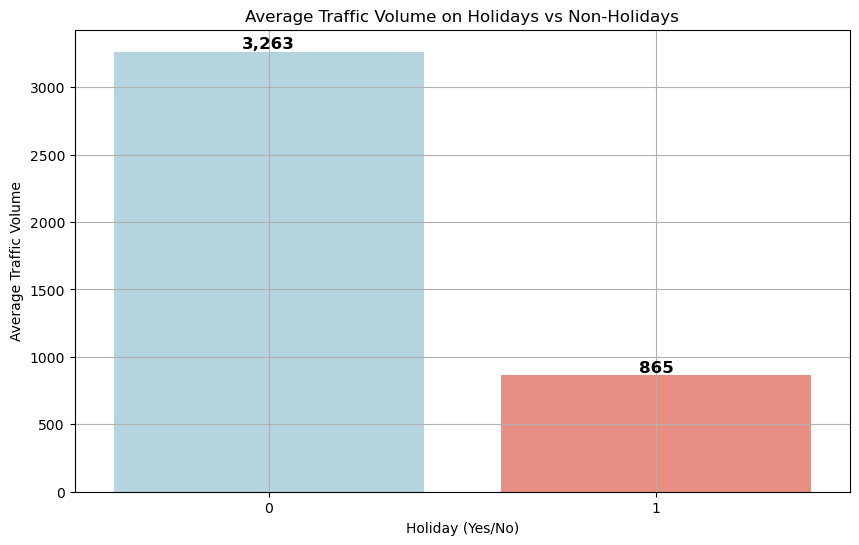

In [22]:
import matplotlib.pyplot as plt
import seaborn as sns

# Group data by holiday and calculate average traffic volume
holiday_traffic = Data.groupby('holiday')['traffic_volume'].mean().reset_index()

# Create figure
plt.figure(figsize=(10, 6))

# Create barplot
ax = sns.barplot(x='holiday', y='traffic_volume', data=holiday_traffic, palette=['lightblue', 'salmon'])

# Set title and labels
plt.title('Average Traffic Volume on Holidays vs Non-Holidays')
plt.xlabel('Holiday (Yes/No)')
plt.ylabel('Average Traffic Volume')
plt.grid()

# Add value labels on bars
for p in ax.patches:
    ax.annotate(f'{p.get_height():,.0f}', 
                (p.get_x() + p.get_width() / 2, p.get_height()), 
                ha='center', va='bottom', fontsize=12, fontweight='bold', color='black')

# Show plot
plt.show()


C:\Users\devra\AppData\Local\Temp\ipykernel_20628\3776192436.py:21: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(weather_mapping.keys(), rotation=45)


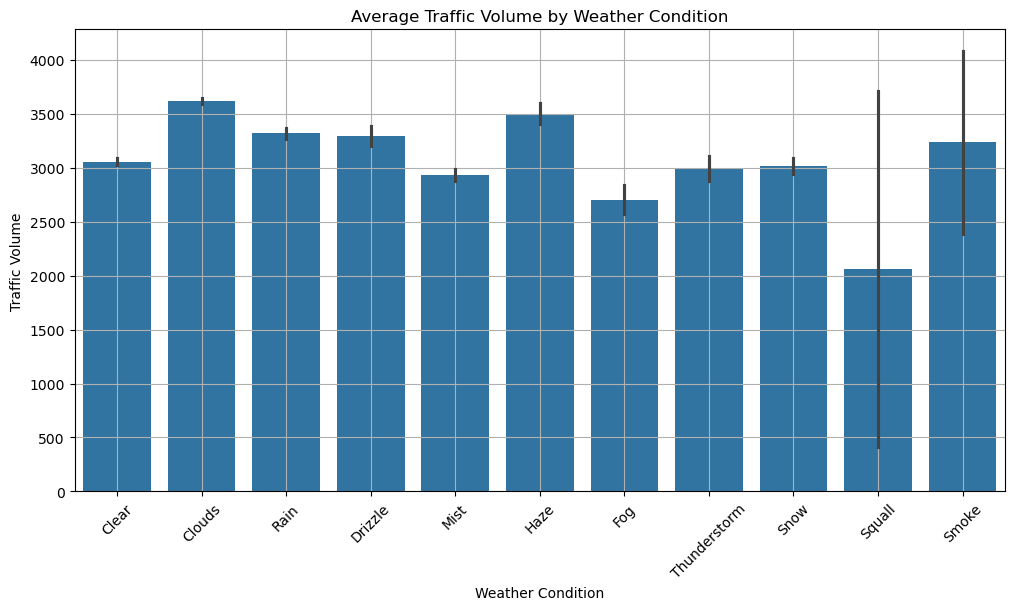

In [23]:
import matplotlib.pyplot as plt
import seaborn as sns

# Define weather mapping
weather_mapping = {
    'Clear': 0, 'Clouds': 1, 'Rain': 2, 'Drizzle': 3, 'Mist': 4, 
    'Haze': 5, 'Fog': 6, 'Thunderstorm': 7, 'Snow': 8, 'Squall': 9, 'Smoke': 10
}

# Bar Chart: Average Traffic Volume by Weather Condition
plt.figure(figsize=(12, 6))
ax = sns.barplot(x='weather', y='traffic_volume', data=Data)

# Set title and labels
plt.title('Average Traffic Volume by Weather Condition')
plt.xlabel('Weather Condition')
plt.ylabel('Traffic Volume')
plt.grid()

# Update x-axis labels with mapping
ax.set_xticklabels(weather_mapping.keys(), rotation=45)

plt.show()


In [24]:
y = Data['traffic_volume'] 
x = Data.drop('traffic_volume',axis=1)

In [25]:
from sklearn import model_selection
x_train,x_test,y_train,y_test=model_selection.train_test_split(x,y,test_size=0.2,random_state =0)

In [26]:
from sklearn import linear_model

from sklearn import ensemble

from sklearn import svm

import xgboost

lin_reg = linear_model.LinearRegression()

Rand = ensemble.RandomForestRegressor()

svr = svm.SVR()

XGB = xgboost.XGBRegressor()

In [27]:
lin_reg.fit(x_train,y_train)


LinearRegression()

In [28]:

Rand.fit(x_train,y_train)


RandomForestRegressor()

In [29]:

svr.fit(x_train,y_train)


SVR()

In [30]:

XGB.fit(x_train,y_train)


XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

In [31]:

p1 = lin_reg.predict(x_train)

p2 = Rand.predict(x_train)

p3 = svr.predict(x_train)

p4 = XGB.predict(x_train)

# RandomForest Give The Best R-Score Value

In [33]:
from sklearn.metrics import r2_score

r1 = r2_score(y_train, p1)  # Linear Regression
r2 = r2_score(y_train, p2)  # Random Forest
r3 = r2_score(y_train, p3)  # Support Vector Regressor (SVR)
r4 = r2_score(y_train, p4)  # XGBoost

# Print R² scores
print(f"Linear Regression R²: {r1:.4f}")
print(f"Random Forest R²: {r2:.4f}")
print(f"SVR R²: {r3:.4f}")
print(f"XGBoost R²: {r4:.4f}")

# Find the best model
best_r2 = max(r1,r2, r3, r4)
best_model = ["Linear Regression","Random Forest", "SVR", "XGBoost"][
    [r1,r2, r3, r4,].index(best_r2)
]

print(f"\nBest Model: {best_model} with R² = {best_r2:.4f}")


Linear Regression R²: 0.1331
Random Forest R²: 0.9776
SVR R²: -0.0033
XGBoost R²: 0.8715

Best Model: Random Forest with R² = 0.9776


In [34]:
import pickle

In [35]:
pickle.dump(Rand, open("model.pkl",'wb'))
